# vanishing gradient

## sigmoid - gauss

データ読み込み完了
Generation: 0010. 正答率(トレーニング) = 0.1600 正答率(テスト) = 0.1135
Generation: 0020. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.1135
Generation: 0030. 正答率(トレーニング) = 0.0500 正答率(テスト) = 0.1135
Generation: 0040. 正答率(トレーニング) = 0.0800 正答率(テスト) = 0.1135
Generation: 0050. 正答率(トレーニング) = 0.1500 正答率(テスト) = 0.1135
Generation: 0060. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0070. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0080. 正答率(トレーニング) = 0.0600 正答率(テスト) = 0.1028
Generation: 0090. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0100. 正答率(トレーニング) = 0.0800 正答率(テスト) = 0.1135
Generation: 0110. 正答率(トレーニング) = 0.1500 正答率(テスト) = 0.0958
Generation: 0120. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.0958
Generation: 0130. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1135
Generation: 0140. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.1135
Generation: 0150. 正答率(トレーニング) = 0.0700 正答率(テスト) = 0.1028
Generation: 0160. 正答率(トレーニング) = 0.0700 正答率(テスト) = 0.1028
Generation: 0170. 正答率(トレーニング) = 0.1000 正答率(テスト) = 0.1135
Generation: 0180. 正答率

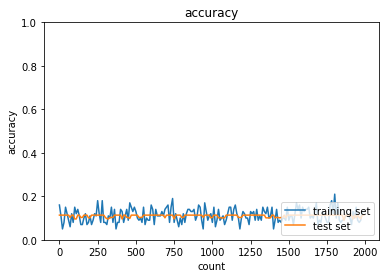

In [10]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)

    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    last_d_f = functions.d_softmax_with_loss
    
    
    # 出力層でのデルタ
    delta3 = last_d_f(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - gauss

データ読み込み完了
Generation: 0010. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.0974
Generation: 0020. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.0974
Generation: 0030. 正答率(トレーニング) = 0.1000 正答率(テスト) = 0.0974
Generation: 0040. 正答率(トレーニング) = 0.0800 正答率(テスト) = 0.0974
Generation: 0050. 正答率(トレーニング) = 0.1000 正答率(テスト) = 0.0974
Generation: 0060. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.1135
Generation: 0070. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0080. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0090. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0100. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0110. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1135
Generation: 0120. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0130. 正答率(トレーニング) = 0.1500 正答率(テスト) = 0.1135
Generation: 0140. 正答率(トレーニング) = 0.0800 正答率(テスト) = 0.1135
Generation: 0150. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1135
Generation: 0160. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.1135
Generation: 0170. 正答率(トレーニング) = 0.0700 正答率(テスト) = 0.1135
Generation: 0180. 正答率

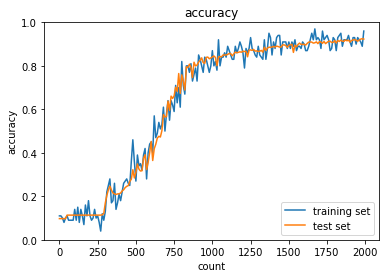

In [11]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)
            
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############

    hidden_f = functions.relu

    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## sigmoid - Xavier

データ読み込み完了
Generation: 0010. 正答率(トレーニング) = 0.1300 正答率(テスト) = 0.0978
Generation: 0020. 正答率(トレーニング) = 0.1600 正答率(テスト) = 0.0975
Generation: 0030. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.0982
Generation: 0040. 正答率(トレーニング) = 0.1600 正答率(テスト) = 0.1405
Generation: 0050. 正答率(トレーニング) = 0.2200 正答率(テスト) = 0.1942
Generation: 0060. 正答率(トレーニング) = 0.2900 正答率(テスト) = 0.2216
Generation: 0070. 正答率(トレーニング) = 0.2400 正答率(テスト) = 0.2331
Generation: 0080. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1903
Generation: 0090. 正答率(トレーニング) = 0.2100 正答率(テスト) = 0.1816
Generation: 0100. 正答率(トレーニング) = 0.1600 正答率(テスト) = 0.1739
Generation: 0110. 正答率(トレーニング) = 0.3000 正答率(テスト) = 0.2189
Generation: 0120. 正答率(トレーニング) = 0.2600 正答率(テスト) = 0.2432
Generation: 0130. 正答率(トレーニング) = 0.2700 正答率(テスト) = 0.2426
Generation: 0140. 正答率(トレーニング) = 0.2300 正答率(テスト) = 0.3157
Generation: 0150. 正答率(トレーニング) = 0.4600 正答率(テスト) = 0.3873
Generation: 0160. 正答率(トレーニング) = 0.3600 正答率(テスト) = 0.3795
Generation: 0170. 正答率(トレーニング) = 0.3900 正答率(テスト) = 0.3895
Generation: 0180. 正答率

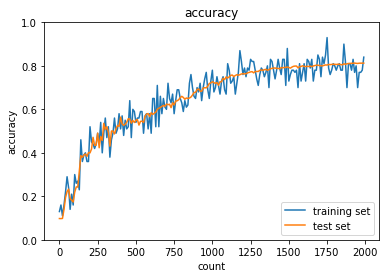

In [12]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20
#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    
    ###########  変更箇所  ##############
    
    # Xavierの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / (np.sqrt(input_layer_size))
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / (np.sqrt(hidden_layer_1_size))
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / (np.sqrt(hidden_layer_2_size))
    
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - He

データ読み込み完了
Generation: 0010. 正答率(トレーニング) = 0.2400 正答率(テスト) = 0.2491
Generation: 0020. 正答率(トレーニング) = 0.4100 正答率(テスト) = 0.4340
Generation: 0030. 正答率(トレーニング) = 0.6000 正答率(テスト) = 0.5566
Generation: 0040. 正答率(トレーニング) = 0.6800 正答率(テスト) = 0.7411
Generation: 0050. 正答率(トレーニング) = 0.8100 正答率(テスト) = 0.7977
Generation: 0060. 正答率(トレーニング) = 0.7800 正答率(テスト) = 0.7292
Generation: 0070. 正答率(トレーニング) = 0.8000 正答率(テスト) = 0.8040
Generation: 0080. 正答率(トレーニング) = 0.8200 正答率(テスト) = 0.8486
Generation: 0090. 正答率(トレーニング) = 0.8500 正答率(テスト) = 0.8405
Generation: 0100. 正答率(トレーニング) = 0.8100 正答率(テスト) = 0.8580
Generation: 0110. 正答率(トレーニング) = 0.8200 正答率(テスト) = 0.7807
Generation: 0120. 正答率(トレーニング) = 0.8500 正答率(テスト) = 0.8498
Generation: 0130. 正答率(トレーニング) = 0.8500 正答率(テスト) = 0.8305
Generation: 0140. 正答率(トレーニング) = 0.8400 正答率(テスト) = 0.8848
Generation: 0150. 正答率(トレーニング) = 0.9000 正答率(テスト) = 0.8720
Generation: 0160. 正答率(トレーニング) = 0.8900 正答率(テスト) = 0.8938
Generation: 0170. 正答率(トレーニング) = 0.7900 正答率(テスト) = 0.8876
Generation: 0180. 正答率

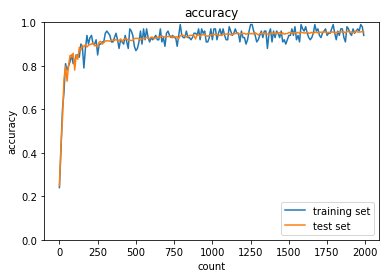

In [13]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    ###########  変更箇所  ##############

    # Heの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size) * np.sqrt(2)
        
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_f = functions.relu
    
    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 課題1: 隠れ層のサイズを変更

- Sigmoid - gauss では勾配消失で良いサンプルにならないため、ReLU - gauss の隠れ層を変化させてみる。
- hidden_layer_1_size, hidden_layer_2_size をそれぞれ 2倍, 4倍 にしてみる。

データ読み込み完了
################################################################################
## hidden_layer_1_size, hidden_layer_2_size を 2倍
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.0600 正答率(テスト) = 0.1028
Generation: 0020. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0030. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0040. 正答率(トレーニング) = 0.0800 正答率(テスト) = 0.1135
Generation: 0050. 正答率(トレーニング) = 0.1100 正答率(テスト) = 0.1135
Generation: 0060. 正答率(トレーニング) = 0.1300 正答率(テスト) = 0.1135
Generation: 0070. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0080. 正答率(トレーニング) = 0.0700 正答率(テスト) = 0.0958
Generation: 0090. 正答率(トレーニング) = 0.1000 正答率(テスト) = 0.0958
Generation: 0100. 正答率(トレーニング) = 0.1300 正答率(テスト) = 0.0958
Generation: 0110. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.0958
Generation: 0120. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.0958
Generation: 0130. 正答率(トレーニング) = 0.1300 正答率(テスト) = 0.0958
Generation: 0140. 正答率(トレーニング) = 0.1400

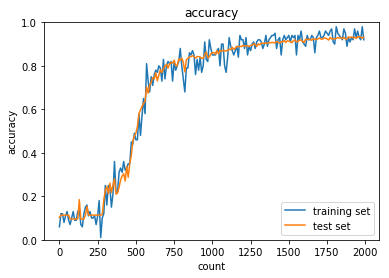

################################################################################
## hidden_layer_1_size, hidden_layer_2_size を 4倍
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.0700 正答率(テスト) = 0.1089
Generation: 0020. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0030. 正答率(トレーニング) = 0.1700 正答率(テスト) = 0.1135
Generation: 0040. 正答率(トレーニング) = 0.1300 正答率(テスト) = 0.1135
Generation: 0050. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0060. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1135
Generation: 0070. 正答率(トレーニング) = 0.1500 正答率(テスト) = 0.1135
Generation: 0080. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1135
Generation: 0090. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0100. 正答率(トレーニング) = 0.0800 正答率(テスト) = 0.1135
Generation: 0110. 正答率(トレーニング) = 0.0900 正答率(テスト) = 0.1135
Generation: 0120. 正答率(トレーニング) = 0.1900 正答率(テスト) = 0.1135
Generation: 0130. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.1135
Generation: 0140. 正答率(トレーニング) = 0.1200 正答率(テスト) 

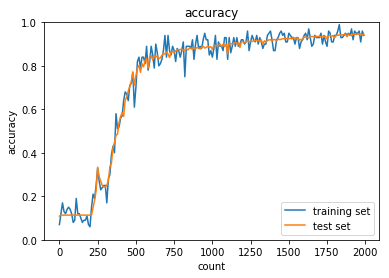

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784

################################################################################
## 【レポート提出者変更】
################################################################################
#中間層サイズ
hidden_layer_1_size = 80 # original: 40 -> 2倍
hidden_layer_2_size = 40 # original: 20 -> 2倍

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)
            
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############

    hidden_f = functions.relu

    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

print('################################################################################')
print('## hidden_layer_1_size, hidden_layer_2_size を 2倍')
print('################################################################################')

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後中間層変更後の再実行に必要な箇所のみ追加実装
################################################################################

#中間層サイズ
hidden_layer_1_size = 160 # original: 40 -> 4倍
hidden_layer_2_size =  80 # original: 20 -> 4倍

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

print('################################################################################')
print('## hidden_layer_1_size, hidden_layer_2_size を 4倍')
print('################################################################################')

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


# 課題2: Sigmoid - Xavier => He へ変更


データ読み込み完了
Generation: 0010. 正答率(トレーニング) = 0.0600 正答率(テスト) = 0.0825
Generation: 0020. 正答率(トレーニング) = 0.1500 正答率(テスト) = 0.1288
Generation: 0030. 正答率(トレーニング) = 0.1600 正答率(テスト) = 0.1485
Generation: 0040. 正答率(トレーニング) = 0.2800 正答率(テスト) = 0.3173
Generation: 0050. 正答率(トレーニング) = 0.3500 正答率(テスト) = 0.3047
Generation: 0060. 正答率(トレーニング) = 0.3700 正答率(テスト) = 0.3646
Generation: 0070. 正答率(トレーニング) = 0.2800 正答率(テスト) = 0.3267
Generation: 0080. 正答率(トレーニング) = 0.3300 正答率(テスト) = 0.3756
Generation: 0090. 正答率(トレーニング) = 0.2700 正答率(テスト) = 0.3378
Generation: 0100. 正答率(トレーニング) = 0.4800 正答率(テスト) = 0.4898
Generation: 0110. 正答率(トレーニング) = 0.4100 正答率(テスト) = 0.4585
Generation: 0120. 正答率(トレーニング) = 0.5000 正答率(テスト) = 0.4668
Generation: 0130. 正答率(トレーニング) = 0.4300 正答率(テスト) = 0.4682
Generation: 0140. 正答率(トレーニング) = 0.5200 正答率(テスト) = 0.5289
Generation: 0150. 正答率(トレーニング) = 0.6000 正答率(テスト) = 0.5617
Generation: 0160. 正答率(トレーニング) = 0.6400 正答率(テスト) = 0.6153
Generation: 0170. 正答率(トレーニング) = 0.6000 正答率(テスト) = 0.5734
Generation: 0180. 正答率

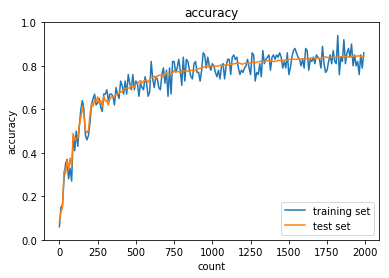

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20
#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    
    ###########  変更箇所  ##############
    
    # Xavierの初期値
    #network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / (np.sqrt(input_layer_size))
    #network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / (np.sqrt(hidden_layer_1_size))
    #network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / (np.sqrt(hidden_layer_2_size))
    
    # Heの初期値 - 【レポート提出者変更】
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size) * np.sqrt(2)
    
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 課題3: Relu - He => Xavier へ変更


データ読み込み完了
Generation: 0010. 正答率(トレーニング) = 0.1800 正答率(テスト) = 0.2302
Generation: 0020. 正答率(トレーニング) = 0.4600 正答率(テスト) = 0.3720
Generation: 0030. 正答率(トレーニング) = 0.6500 正答率(テスト) = 0.5645
Generation: 0040. 正答率(トレーニング) = 0.6400 正答率(テスト) = 0.6140
Generation: 0050. 正答率(トレーニング) = 0.6700 正答率(テスト) = 0.6816
Generation: 0060. 正答率(トレーニング) = 0.8000 正答率(テスト) = 0.7620
Generation: 0070. 正答率(トレーニング) = 0.8200 正答率(テスト) = 0.8183
Generation: 0080. 正答率(トレーニング) = 0.7800 正答率(テスト) = 0.8000
Generation: 0090. 正答率(トレーニング) = 0.8300 正答率(テスト) = 0.8377
Generation: 0100. 正答率(トレーニング) = 0.7900 正答率(テスト) = 0.8413
Generation: 0110. 正答率(トレーニング) = 0.7900 正答率(テスト) = 0.8472
Generation: 0120. 正答率(トレーニング) = 0.8700 正答率(テスト) = 0.8670
Generation: 0130. 正答率(トレーニング) = 0.8700 正答率(テスト) = 0.8478
Generation: 0140. 正答率(トレーニング) = 0.9000 正答率(テスト) = 0.8777
Generation: 0150. 正答率(トレーニング) = 0.8400 正答率(テスト) = 0.8717
Generation: 0160. 正答率(トレーニング) = 0.8500 正答率(テスト) = 0.8810
Generation: 0170. 正答率(トレーニング) = 0.8500 正答率(テスト) = 0.8724
Generation: 0180. 正答率

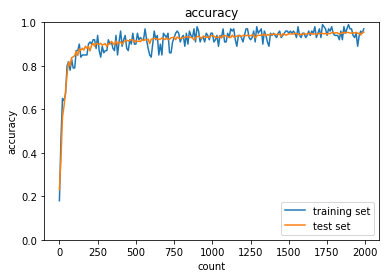

In [4]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    ###########  変更箇所  ##############

    # Heの初期値
    #network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    #network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
    #network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size) * np.sqrt(2)
    
    # Xavierの初期値 - 【レポート提出者変更】
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size)
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size)
        
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_f = functions.relu
    
    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()